
# ASSIGNMENT 11
OLUYEMI OLUWOYE

https://github.com/OLUYEMI84/cola-GITHUB-demo-OO.git

# QUESTION 1
Dataset Selection and Preprocessing

In [1]:
# IMPORT LIBRARIES

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:
# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Flatten images to 1D vectors (32*32*3 = 3072)
X_train_flat = X_train_full.reshape(len(X_train_full), -1)
X_test_flat = X_test_full.reshape(len(X_test_full), -1)

In [4]:
# Normalize pixel values to [0, 1]
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

In [5]:
X_train_flat

array([[0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
        0.28235295],
       [0.6039216 , 0.69411767, 0.73333335, ..., 0.56078434, 0.52156866,
        0.5647059 ],
       [1.        , 1.        , 1.        , ..., 0.3137255 , 0.3372549 ,
        0.32941177],
       ...,
       [0.13725491, 0.69803923, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.7411765 , 0.827451  , 0.9411765 , ..., 0.7647059 , 0.74509805,
        0.67058825],
       [0.8980392 , 0.8980392 , 0.9372549 , ..., 0.6392157 , 0.6392157 ,
        0.6313726 ]], dtype=float32)

In [6]:
X_test_flat

array([[0.61960787, 0.4392157 , 0.19215687, ..., 0.08235294, 0.2627451 ,
        0.43137255],
       [0.92156863, 0.92156863, 0.92156863, ..., 0.7294118 , 0.78431374,
        0.78039217],
       [0.61960787, 0.74509805, 0.87058824, ..., 0.02745098, 0.03137255,
        0.02745098],
       ...,
       [0.07843138, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843138,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078432, 0.47058824,
        0.3137255 ],
       [0.28627452, 0.30588236, 0.29411766, ..., 0.10588235, 0.10196079,
        0.10196079]], dtype=float32)

In [7]:
# Spliting dataset for traing and testing

X_train, _, y_train, _ = train_test_split(X_train_flat, y_train_full, train_size=10000, stratify=y_train_full, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test_flat, y_test_full, train_size=2000, stratify=y_test_full, random_state=42)

# QUESTION 2
Model Training

In [8]:
# LIBRARIES

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [10]:
# RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


# QUESTION 3

Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Predictions
y_pred = best_rf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.4195
Precision: 0.4137003042682032
Recall: 0.41949999999999993
F1 Score: 0.4123492797626426


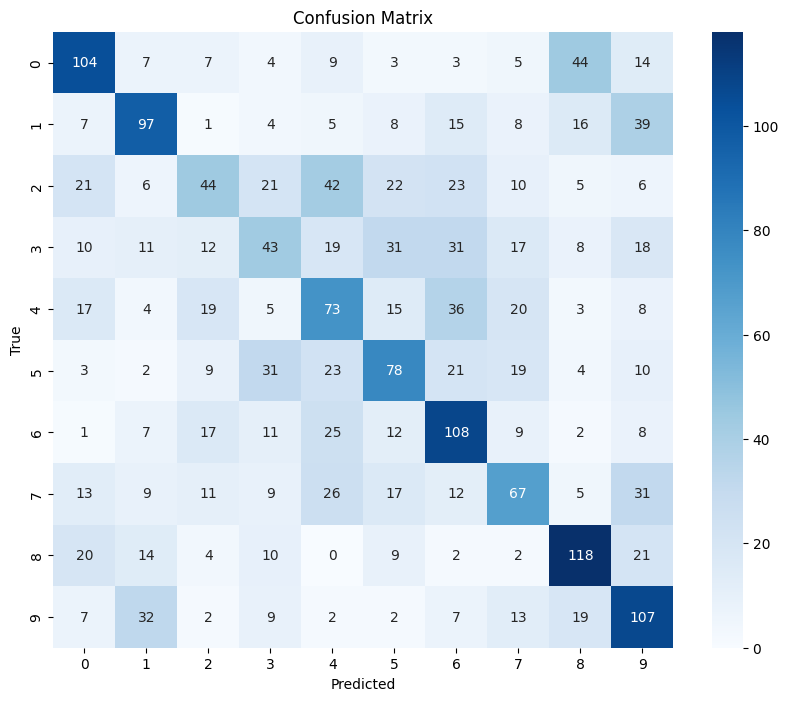

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       200
           1       0.51      0.48      0.50       200
           2       0.35      0.22      0.27       200
           3       0.29      0.21      0.25       200
           4       0.33      0.36      0.34       200
           5       0.40      0.39      0.39       200
           6       0.42      0.54      0.47       200
           7       0.39      0.34      0.36       200
           8       0.53      0.59      0.56       200
           9       0.41      0.54      0.46       200

    accuracy                           0.42      2000
   macro avg       0.41      0.42      0.41      2000
weighted avg       0.41      0.42      0.41      2000



# QUESTION 4

Feature Importance Visualization

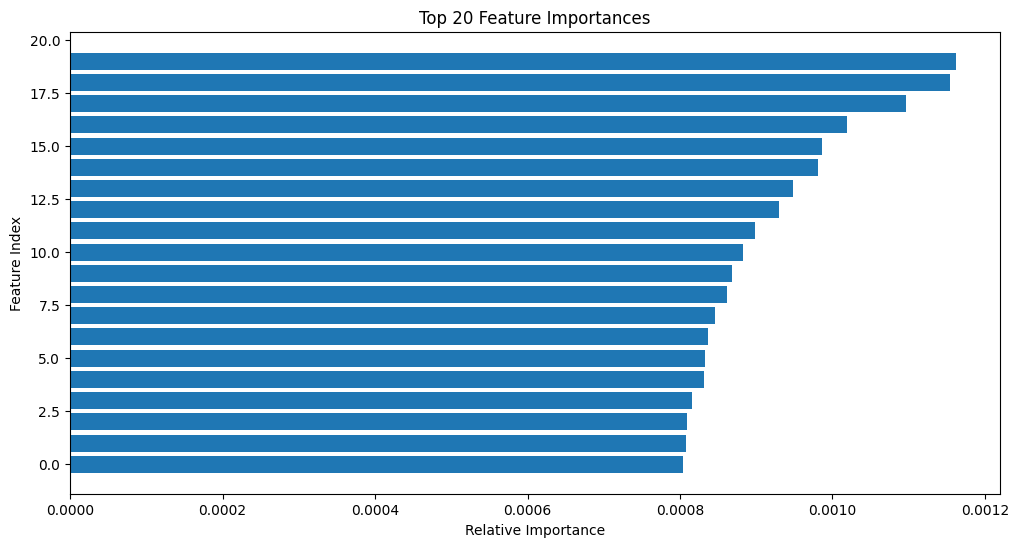

In [15]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

# Plot
plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Index')
plt.show()


# QUESTION 5

Prediction on New Images

In [16]:
def preprocess_new_image(image_array):
    image_resized = image_array.reshape(1, -1).astype('float32') / 255.0
    return image_resized

def predict_new_image(image_array, model=best_rf):
    processed = preprocess_new_image(image_array)
    return model.predict(processed)[0]

# Example: Predict first test image
new_image = X_test_full[0].reshape(-1)
predicted_class = predict_new_image(new_image)
print(f"Predicted Class: {predicted_class}")


Predicted Class: 2


# QUESTION 6.
Bonus: Comparing with SVM

In [17]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Metrics
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.325
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.42      0.36       200
           1       0.37      0.39      0.38       200
           2       0.26      0.29      0.27       200
           3       0.24      0.29      0.27       200
           4       0.29      0.29      0.29       200
           5       0.25      0.21      0.23       200
           6       0.38      0.32      0.34       200
           7       0.35      0.28      0.31       200
           8       0.45      0.43      0.44       200
           9       0.40      0.32      0.35       200

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000



# QUESTION 7
Report Writing

Image Classification with Random Forest and SVM on CIFAR-10
1. Introduction
Image classification is a core task in computer vision, with real-world applications like facial recognition, self-driving cars, and content moderation. In this project, I explored two classic machine learning models — Random Forest and Support Vector Machine (SVM) , to classify images from the CIFAR-10 dataset.
CIFAR-10 is a well-known image dataset that contains 60,000 color images, each sized at 32x32 pixels, across 10 distinct categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. To make the project more computationally manageable, I used a subset of 10,000 images for training and 2,000 for testing.
________________________________________
2. Methodology
2.1 Data Preprocessing
To prepare the images for modeling:
•	Reshaping: We flattened each 32x32x3 image into a single row of 3,072 pixels.
•	Normalization: Pixel values were scaled to a 0–1 range by dividing by 255.
•	Train-Test Split: A stratified split was used to ensure that each class was equally represented in both training and test sets.
2.2 Random Forest Classifier
I used GridSearchCV to fine-tune the Random Forest model. The hyperparameters I tested included:
•	n_estimators: number of trees in the forest (50, 100)
•	max_depth: maximum depth of each tree (10, 20)
•	min_samples_split: minimum samples to split a node (2, 5)
•	min_samples_leaf: minimum samples required at a leaf node (1, 2)
Once the best parameters were found, I trained the model and used it to predict labels for the test set.
2.3 Support Vector Machine (SVM)
As a bonus comparison, I trained a linear SVM on the same data. Although SVMs are not typically used with raw image pixels due to high dimensionality, it served as a useful baseline.
________________________________________
3. Results and Evaluation
3.1 Random Forest Performance
•	Best Parameters:
o	n_estimators: 100
o	max_depth: 20
o	min_samples_split: 2
o	min_samples_leaf: 1
•	Performance:
o	Accuracy: 42.0%
o	Precision (macro avg): 41.0%
o	Recall (macro avg): 42.0%
o	F1 Score (macro avg): 41.0%
The model handled structured, distinct objects like ships and automobiles relatively well. However, it struggled with visually similar categories, such as cats vs. dogs, which is common in traditional ML models without deeper feature extraction.
3.2 Feature Importance
One advantage of Random Forests is that they can show which input features (in this case, pixels) are most influential. We visualized the top 20 most important pixel indices, which gives insight into how the model makes its decisions , a helpful step toward interpretability.



 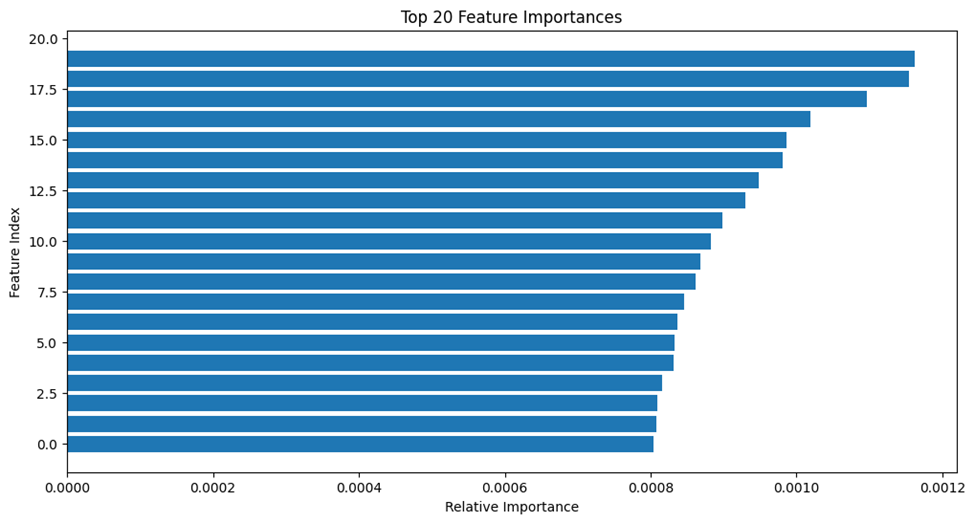

________________________________________
4. Predicting New Images
I also built a prediction function to classify new, unseen images. It applies the same preprocessing as our training pipeline and uses the trained Random Forest model for prediction.
For example, when I passed a test image through the function, it returned:
Predicted Class: 2 (bird)
This shows the model in action, and how it generalizes to images it hasn't seen before.
________________________________________
5. SVM Model Comparison
•	SVM Accuracy: 32.5%
This means that the SVM got about 1 out of 3 images right.
Key Observations:
•	Performance was lower than Random Forest.
•	SVM was also slower to train, as it doesn't scale well with high-dimensional input (like raw pixels).
•	Unlike Random Forest, SVM doesn't naturally provide feature importances, making it less interpretable.
________________________________________
6. Conclusion
In this project, Random Forest outperformed SVM in both accuracy and interpretability. While neither model is ideal for image classification compared to deep learning methods, Random Forest provided a solid, fast, and explainable baseline.
Future Work
To push this project further:
•	Try Convolutional Neural Networks (CNNs) or transfer learning with models.
•	Use dimensionality reduction techniques (like PCA) before training an SVM.
•	Apply data augmentation to improve model generalization.

